<h1><center><b>Dataset Preprocessing</b></center></h1>

# A. Import & File Paths

In [31]:
import hashlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer, FunctionTransformer
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge

from joblib import dump, load

In [2]:
# Make sure that the respective csv files are in the train and test folders.
x_train_csv_path = 'dataset_original/Train_60/X_Train_Data_Input.csv'
y_train_csv_path = 'dataset_original/Train_60/Y_Train_Data_Target.csv'
x_test_csv_path = 'dataset_original/Test_20/X_Test_Data_Input.csv'
y_test_csv_path = 'dataset_original/Test_20/Y_Test_Data_Target.csv'

# B. Checksum
Check the integrity of the original dataset

In [3]:
def calculate_checksum(file_path, hash_algorithm='sha256'):
    try:
        hash_func = hashlib.new(hash_algorithm)
        with open(file_path, 'rb') as file:
            while chunk := file.read(8192):
                hash_func.update(chunk)
        return hash_func.hexdigest()
    except FileNotFoundError:
        return f"Error: File '{file_path}' not found."
    except ValueError:
        return f"Error: Invalid hash algorithm '{hash_algorithm}'."
    except Exception as e:
        return f"Error: {str(e)}"

In [4]:
flag = True

checksum = calculate_checksum(x_train_csv_path)
if checksum == '5e4871f01f3aa565aaee0fda58868046ff20c3e5d9084c3edc2c1f33ab97497b':
    print('1) Success: X_Train_Data_Input.csv file is valid')
else:
    print('1) Error: X_Train_Data_Input.csv file is CORRUPTED')
    flag = False

checksum = calculate_checksum(y_train_csv_path)
if checksum == '986eb33c09f9d275b36c1c06fa05de4a06bd9413ab5ed9986fe0f82c66ccf3c8':
    print('2) Success: Y_Train_Data_Target.csv file is valid')
else:
    print('2) Error: Y_Train_Data_Target.csv file is CORRUPTED')
    flag = False

checksum = calculate_checksum(x_test_csv_path)
if checksum == '4def397cabaf0fee6bb34fc47a48d2056a2b33eabb62c32794b6cb96abee8b89':
    print('3) Success: X_Test_Data_Input.csv file is valid')
else:
    print('3) Error: X_Test_Data_Input.csv file is CORRUPTED')
    flag = False

checksum = calculate_checksum(y_test_csv_path)
if checksum == '9857969bc83f591bba87394fb38aeb1ad966f84d4b44534f5f17acb2a9313793':
    print('4) Success: Y_Test_Data_Target.csv file is valid')
else:
    print('4) Error: Y_Test_Data_Target.csv file is CORRUPTED')
    flag = False

if flag:
    print('ALL FILES ARE VALID')
else:
    print('!!WARNING: one or more files are corrupted!!')

1) Success: X_Train_Data_Input.csv file is valid
2) Success: Y_Train_Data_Target.csv file is valid
3) Success: X_Test_Data_Input.csv file is valid
4) Success: Y_Test_Data_Target.csv file is valid
ALL FILES ARE VALID


# C. Load and Visualize Dataset

## 1. Load Dataset

In [5]:
# Load the datasets
X_train = pd.read_csv(x_train_csv_path)
Y_train = pd.read_csv(y_train_csv_path)
X_test = pd.read_csv(x_test_csv_path)
Y_test = pd.read_csv(y_test_csv_path)

# Print the shapes of the datasets
print(f"\nShape of X_Train: {X_train.shape}")
print(f"Shape of Y_Train: {Y_train.shape}")
print(f"Shape of X_Test: {X_test.shape}")
print(f"Shape of Y_Test: {Y_test.shape}")

# Visualize the data
print("Training Data Overview:")
print(X_train.head())
print("\nTraining Target Overview:")
print(Y_train.head())


Shape of X_Train: (785133, 23)
Shape of Y_Train: (785133, 2)
Shape of X_Test: (261712, 23)
Shape of Y_Test: (261712, 2)
Training Data Overview:
                                 ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column12  Column13  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0         0   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0         0   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1         1   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0         0  

## 2. General Info & Missing Values


X_Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  fl

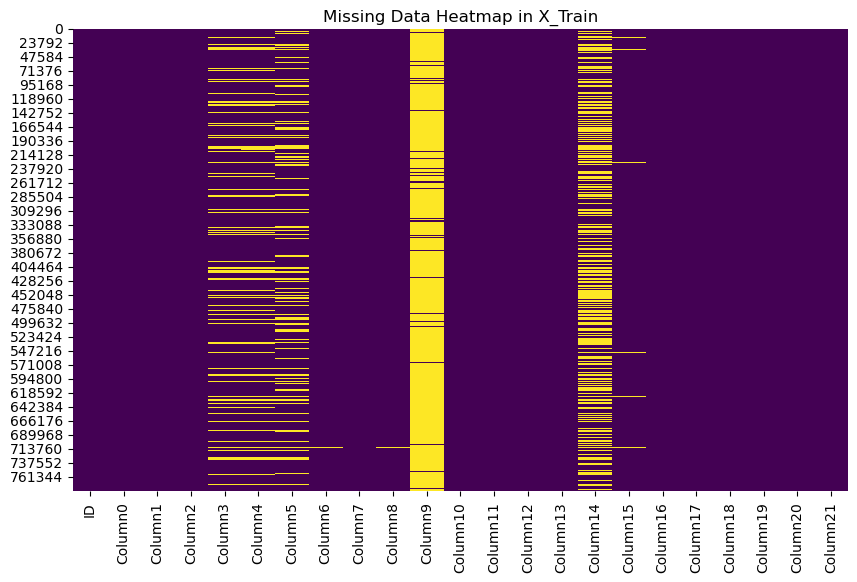

In [7]:
# General info about the datasets
print("\nX_Train Info:")
print(X_train.info())

print("\nY_Train Info:")
print(Y_train.info())

# Check for missing values in both X and Y datasets
print("\nMissing values in X_Train:")
print(X_train.isna().sum())

print("\nMissing values in Y_Train:")
print(Y_train.isna().sum())

# Statistics of the numerical features
print("\nStatistical Summary of X_Train:")
print(X_train.describe())

# Visualizing the distribution of missing values - heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap in X_Train")
plt.show()

Observations:
1. Column9 has very high number of NA values
2. Column14 has high number of NA values
3. Columns 3, 4 and 5 has moderate number of NA values
4. Other columns have very low number of NA values

## 3. Label/Feature Distribution and Correlation Matrix

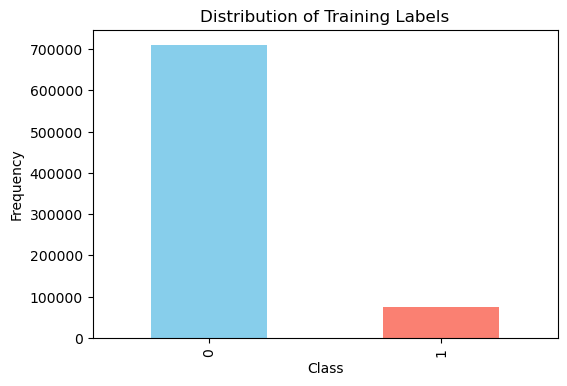

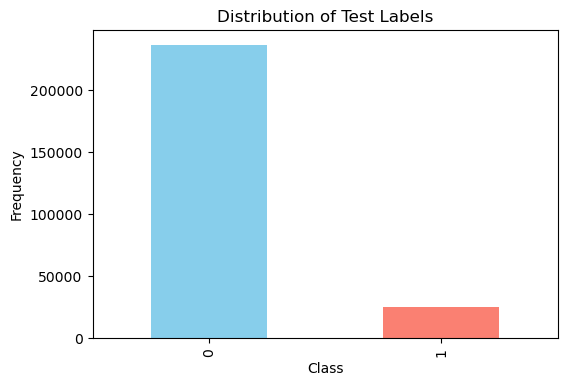

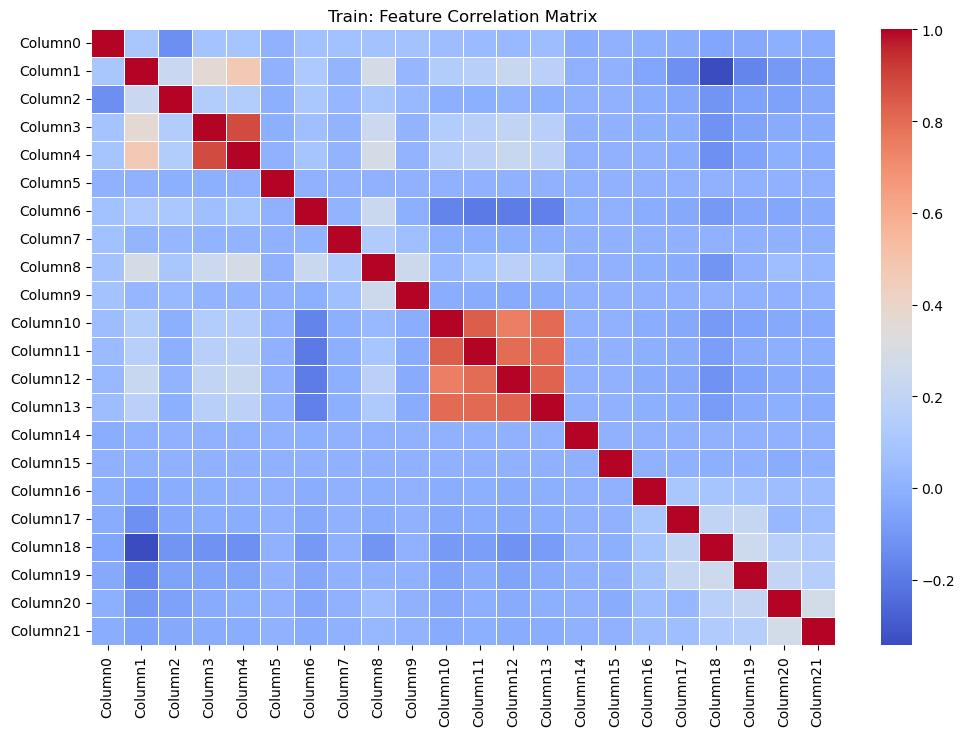

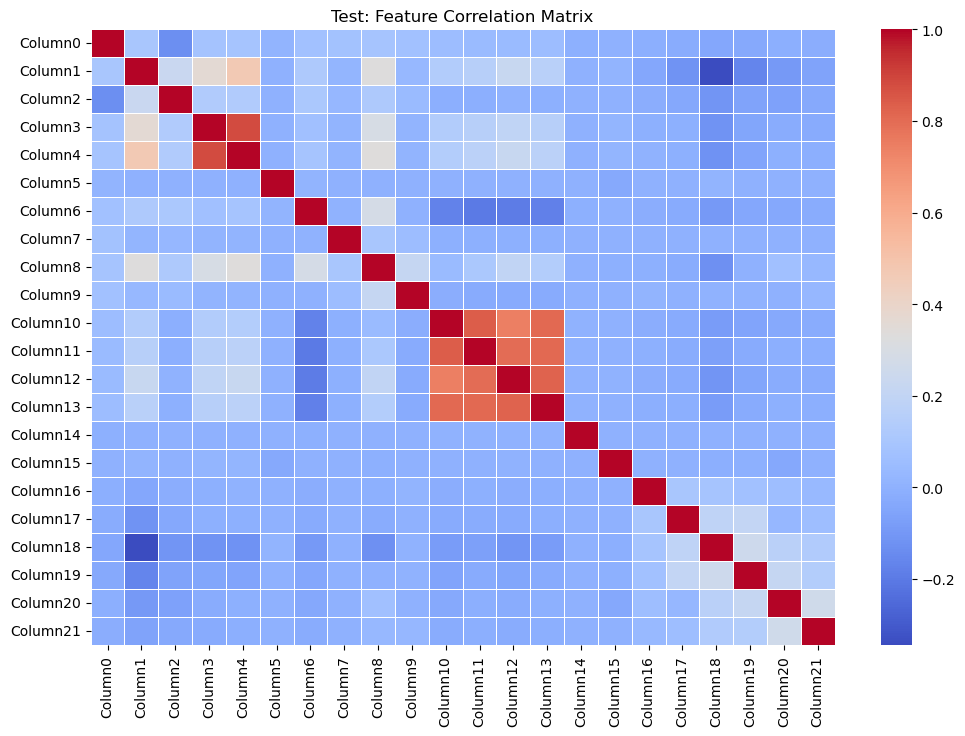

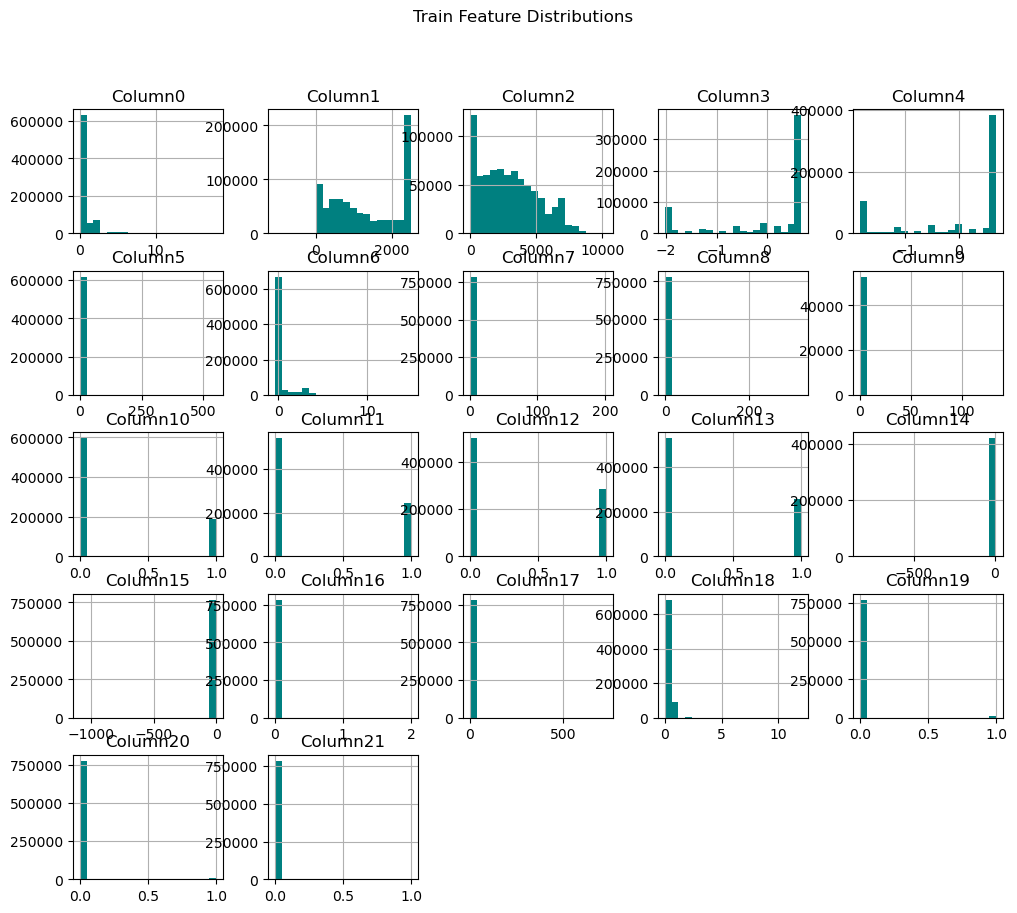

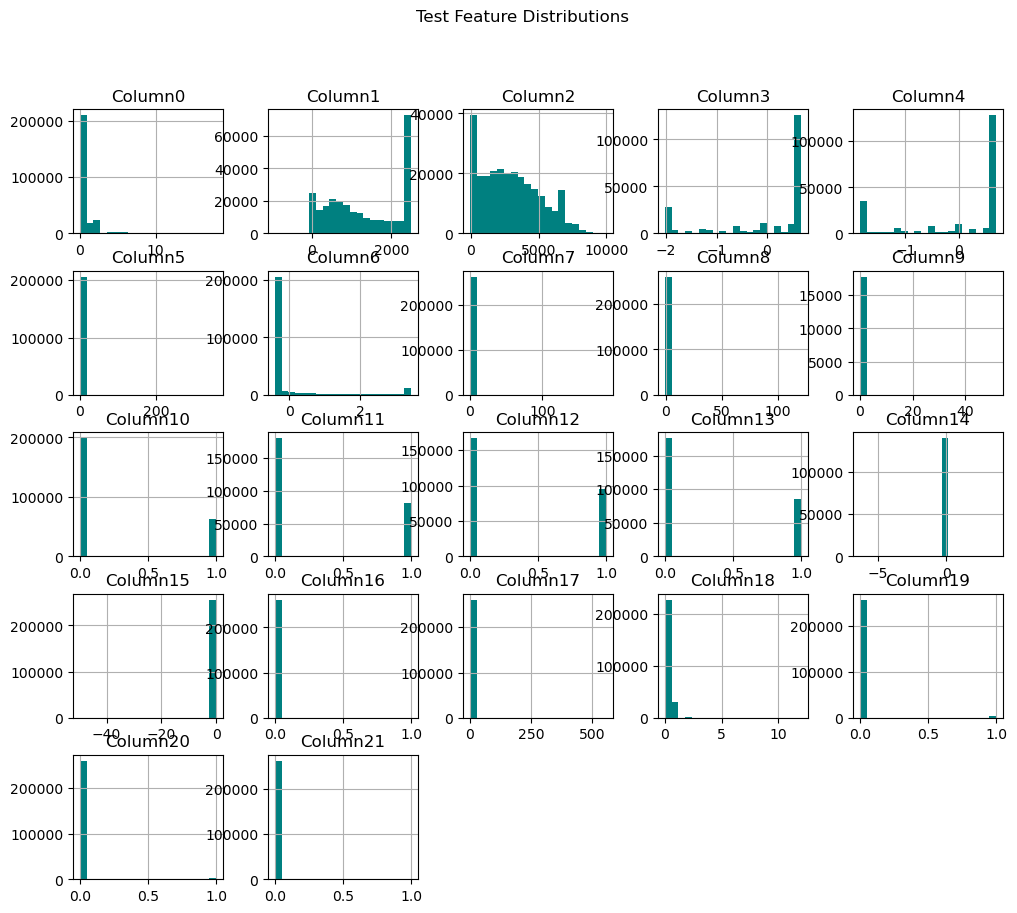

In [10]:
# Train: Visualize the distribution of the target labels in train dataset
plt.figure(figsize=(6,4))
Y_train['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Training Labels')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Test: Visualize the distribution of the target labels in test dataset
plt.figure(figsize=(6,4))
Y_test['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Test Labels')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Train: Visualizing the correlation matrix for numerical features (before handling missing values)
plt.figure(figsize=(12,8))
corr_matrix = X_train.drop('ID', axis=1).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Train: Feature Correlation Matrix")
plt.show()

# Test: Visualizing the correlation matrix for numerical features (before handling missing values)
plt.figure(figsize=(12,8))
corr_matrix = X_test.drop('ID', axis=1).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Test: Feature Correlation Matrix")
plt.show()


# Train: Distribution of each feature - histograms
X_train.hist(figsize=(12,10), bins=20, color='teal')
plt.suptitle('Train Feature Distributions')
plt.show()

# Test: Distribution of each feature - histograms
X_test.hist(figsize=(12,10), bins=20, color='teal')
plt.suptitle('Test Feature Distributions')
plt.show()

Observations:
1. Very high class imbalance
2. Columns 10 to 13 are highly correlated with each other
3. Columns 4 and 3 are highly correlated
4. Other columns are not highly correlated, so no need to delete any other column

## 4. Outliers

Number of outliers using Z-score method: 0
Outliers using Z-score method:
Series([], Name: Column6, dtype: float64)
Number of outliers using IQR method: 178994
Outliers using IQR method:
0         0.434190
1         1.554998
7        -0.094001
18        2.899648
27       -0.124954
            ...   
785112    0.031467
785117    3.437921
785118   -0.210636
785119    1.059935
785132    3.440511
Name: Column6, Length: 178994, dtype: float64


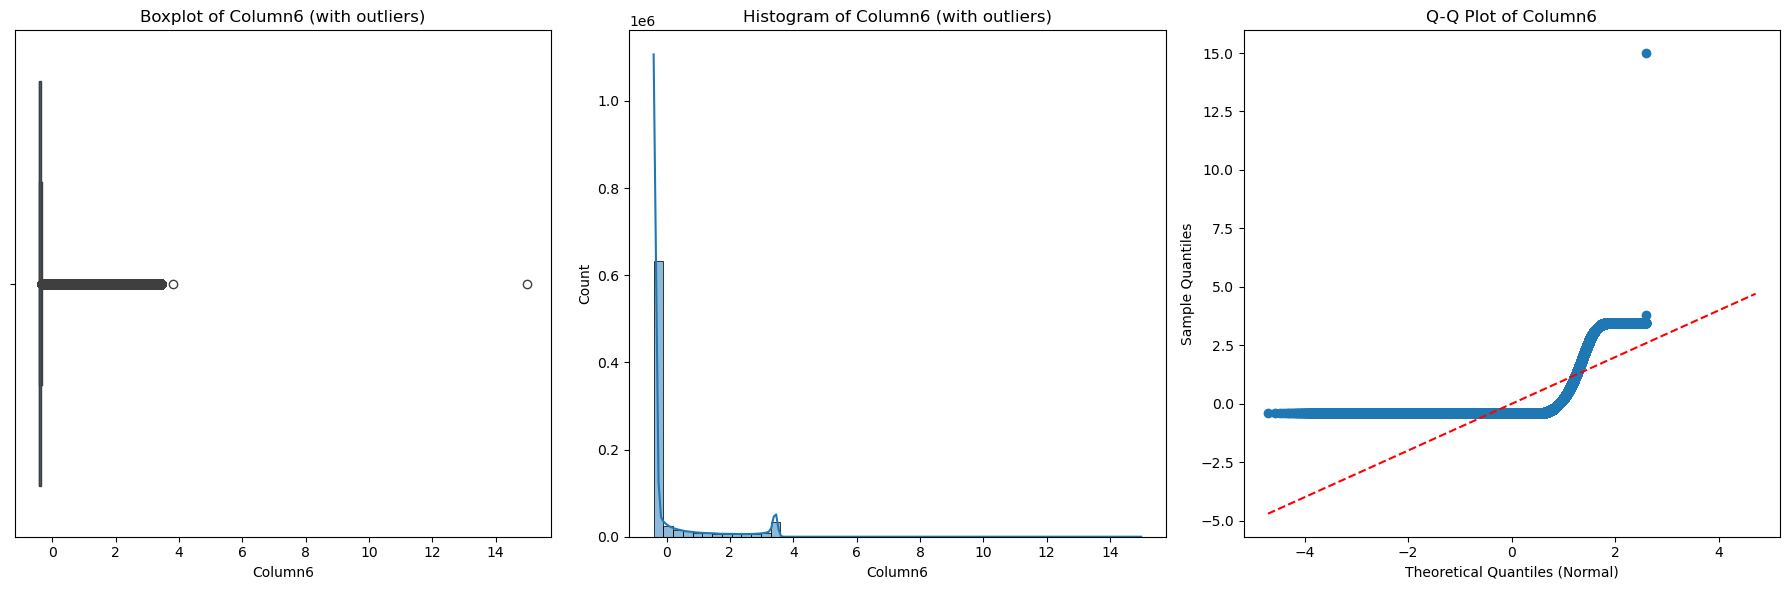

In [138]:
# Column of interest
column_name = 'Column6'

# Z-score method to identify outliers
z_scores = np.abs(stats.zscore(X_train[column_name]))
outliers_zscore = X_train[column_name][z_scores > 3]

# IQR method to identify outliers
Q1 = X_train[column_name].quantile(0.25)
Q3 = X_train[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = X_train[column_name][(X_train[column_name] < lower_bound) | (X_train[column_name] > upper_bound)]

# Details about outliers
print(f"Number of outliers using Z-score method: {len(outliers_zscore)}")
print(f"Outliers using Z-score method:\n{outliers_zscore}")
print(f"Number of outliers using IQR method: {len(outliers_iqr)}")
print(f"Outliers using IQR method:\n{outliers_iqr}")

# Visualization:
plt.figure(figsize=(18, 6))

# 1) Boxplot->
plt.subplot(1, 3, 1)
sns.boxplot(x=X_train[column_name])
plt.title(f'Boxplot of {column_name} (with outliers)')

# 2) Histogram->
plt.subplot(1, 3, 2)
sns.histplot(X_train[column_name], bins=50, kde=True)
plt.title(f'Histogram of {column_name} (with outliers)')


# 3) Q-Q Plot->
plt.subplot(1, 3, 3)
# Generate theoretical quantiles and ordered values
theoretical_quantiles = np.linspace(0, 1, len(X_train[column_name]))
sample_quantiles = np.sort(X_train[column_name])

# Generate normal quantiles for comparison
normal_quantiles = stats.norm.ppf(theoretical_quantiles)

# Scatter plot for Q-Q plot
plt.scatter(normal_quantiles, sample_quantiles)
plt.plot(normal_quantiles, normal_quantiles, color='r', linestyle='--')  # 45-degree reference line
plt.title(f'Q-Q Plot of {column_name}')
plt.xlabel('Theoretical Quantiles (Normal)')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

In [182]:
# Find out the frequencies to see if any one number is dominant
column_name = 'Column15'
frequency = X_train[column_name].value_counts()
print(frequency)

Column15
0.003390    666173
0.003390      2999
0.003390      1863
0.003390      1543
0.003390       987
             ...  
0.003385         1
0.003390         1
0.003390         1
0.003390         1
0.003390         1
Name: count, Length: 66302, dtype: int64


In [209]:
# Outlier detection using Threshold

# Column of interest
column_name = 'Column17'

# Define the threshold : Every point outside the range (-threshold, +threshold) will be displayed.
threshold = 120

# Filter the rows where the column exceeds the threshold
outliers = X_train[abs(X_train[column_name]) > threshold]

# Display the details of such points
print(outliers.shape[0])
print(outliers)

45
        Column0  Column1  Column2   Column3   Column4   Column5   Column6  \
2008        0.0        0   4299.0       NaN       NaN -0.007468 -0.407939   
8481        1.0        1   1557.0       NaN       NaN -0.007469 -0.407939   
16451       1.0        0     65.0       NaN       NaN -0.007469 -0.407939   
20150       0.0        1   2810.0       NaN       NaN -0.007469 -0.407939   
41212       0.0        1   1315.0       NaN       NaN       NaN -0.407939   
42971       0.0        0    835.0       NaN       NaN -0.007468 -0.407939   
72508       0.0        1   1173.0       NaN       NaN -0.007469 -0.407939   
78085       0.0        0   2060.0       NaN       NaN -0.007468 -0.407939   
83987       0.0        0   7421.0       NaN       NaN -0.007469  3.440342   
103217      0.0        0   7045.0       NaN       NaN       NaN -0.407939   
117359      1.0        0    252.0       NaN       NaN -0.007469 -0.407939   
124763      0.0        1   4540.0       NaN       NaN -0.007468 -0.407939

-0.0074686502841777


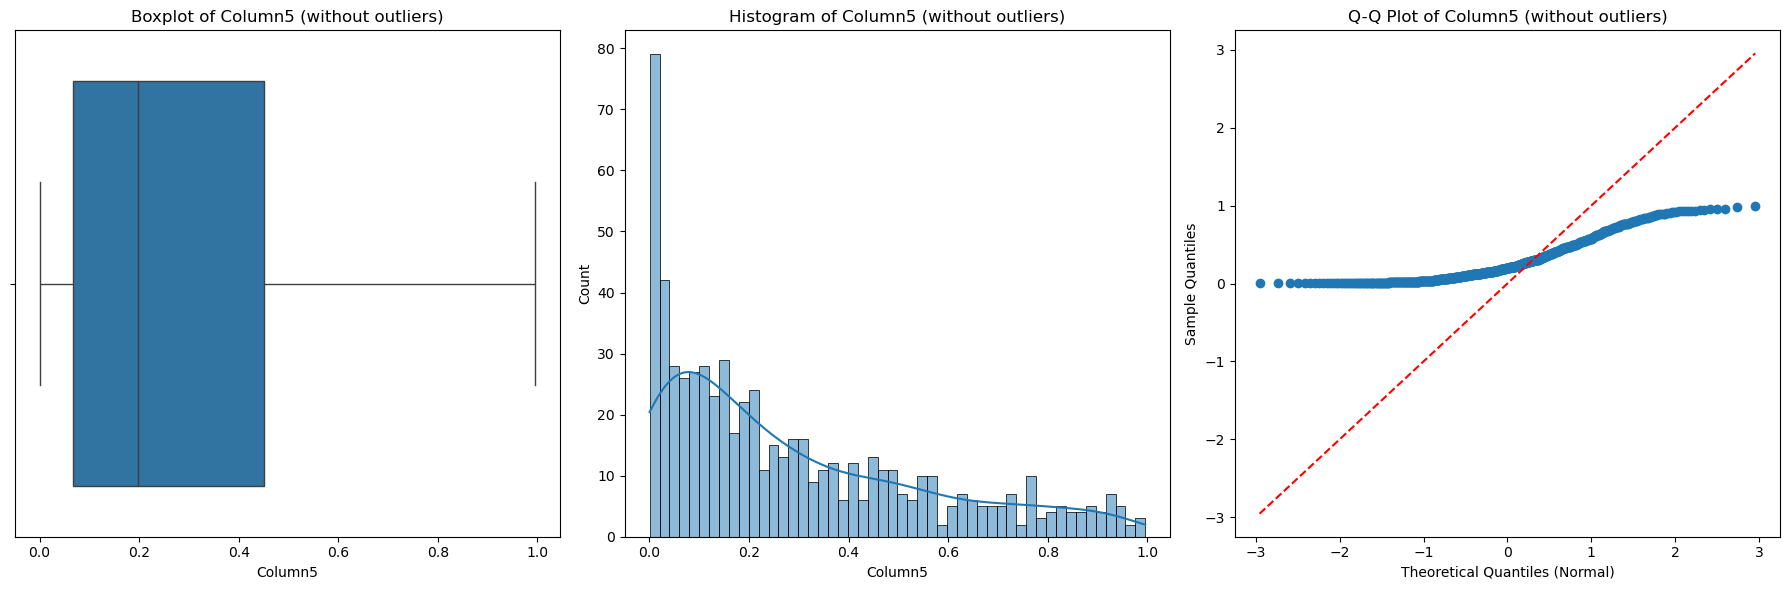

In [10]:
# Plot the histogram and other plots for a certain range:

# Column of interest
column_name = 'Column5'

# Define the range and also define one element/number to exclude in case it's dominating.
min_thresh = 0
max_thresh = 1
excep = X_train[column_name].mode()[0]
#excep = None
print(excep)

# Filter data based on the threshold values
filtered_data = X_train[column_name][(X_train[column_name] > min_thresh) & (X_train[column_name] < max_thresh) & (X_train[column_name] != excep)]

# Visualization: Boxplot, Histogram, and Q-Q Plot for the filtered data
plt.figure(figsize=(18, 6))

# Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=filtered_data)
plt.title(f'Boxplot of {column_name} (without outliers)')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(filtered_data, bins=50, kde=True)
plt.title(f'Histogram of {column_name} (without outliers)')

# Q-Q Plot
plt.subplot(1, 3, 3)
# Generate theoretical quantiles and ordered values from filtered data
theoretical_quantiles = np.linspace(0, 1, len(filtered_data))
sample_quantiles = np.sort(filtered_data)

# Generate normal quantiles for comparison
normal_quantiles = stats.norm.ppf(theoretical_quantiles)

# Scatter plot for Q-Q plot
plt.scatter(normal_quantiles, sample_quantiles)
plt.plot(normal_quantiles, normal_quantiles, color='r', linestyle='--')  # 45-degree reference line
plt.title(f'Q-Q Plot of {column_name} (without outliers)')
plt.xlabel('Theoretical Quantiles (Normal)')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

## 5. Categorical Data

In [41]:
# Display the frequency of all numbers in a column
frequency = X_train['Column0'].value_counts()
print(frequency)

frequency = X_train['Column10'].value_counts()
print(frequency)
frequency = X_train['Column11'].value_counts()
print(frequency)
frequency = X_train['Column12'].value_counts()
print(frequency)
frequency = X_train['Column13'].value_counts()
print(frequency)

frequency = X_train['Column16'].value_counts()
print(frequency)
frequency = X_train['Column17'].value_counts()
print(frequency)
frequency = X_train['Column18'].value_counts()
print(frequency)
frequency = X_train['Column19'].value_counts()
print(frequency)
frequency = X_train['Column20'].value_counts()
print(frequency)
frequency = X_train['Column21'].value_counts()
print(frequency)

Column0
0.0     629558
2.0      73595
1.0      56021
4.0       6296
5.0       6277
6.0       5998
7.0       4156
3.0       1605
9.0        540
8.0        386
11.0       328
12.0       161
15.0        78
14.0        66
13.0        22
10.0        17
16.0        10
18.0         6
17.0         4
Name: count, dtype: int64
Column10
0    596250
1    188883
Name: count, dtype: int64
Column11
0    541394
1    243739
Name: count, dtype: int64
Column12
0    500034
1    285099
Name: count, dtype: int64
Column13
0    527386
1    257747
Name: count, dtype: int64
Column16
0.0    784190
1.0       939
2.0         4
Name: count, dtype: int64
Column17
0      766697
1        3297
2        1947
3        1472
4        1219
        ...  
161         1
123         1
89          1
165         1
157         1
Name: count, Length: 153, dtype: int64
Column18
0.0     682726
1.0      93602
2.0       6221
3.0       1508
4.0        510
5.0        256
6.0        128
7.0         80
8.0         68
9.0         27
12.0   

# D. Clean and Preprocess the Dataset

Observations for each column:
- Column0 : (categorical data 0 to 18) (9 missing) (no outliers) (0 to 5 dominant freq)
- Column1 : (continuous data) (0 missing) (no outliers) (normal distribution with one higher dominant freq)
- Column2 : (continuous data) (0 missing) (no outliers) (normal distribution with one lower dominant freq)
- Column3 : (continuous data) (126303 missing) (no outliers) (flat distribution with extreme dominant freqs)
- Column4 : (continuous data) (127710 missing) (no outliers) (flat distribution with extreme dominant freqs)
- Column5 : (continuous data) (167180 missing) (956 outliers threshold=0.00748) (347951 has same value) [2.7L]
- Column6 : (continuous data) (3850 missing) (2 outliers threshold=4) (561081 has same value) [2.2L]
- Column7 : (continuous data) (0 missing) (4093 outliers threshold=0.015608) (525887 has same value) [2.6L]
- Column8 : (continuous data) (3850 missing) (425 outliers threshold=4) (348274 has same value) [4.3L]
- Column9 : (continuous data) (732137 missing) (3033  outliers threshold=0.1) [0.5L]
- Column10 : (categorical data 0 & 1) (0 missing) (no outliers) (small imbalanced distribution)
- Column11 : (categorical data 0 & 1) (0 missing) (no outliers) (small imbalanced distribution)
- Column12 : (categorical data 0 & 1) (0 missing) (no outliers) (small imbalanced distribution)
- Column13 : (categorical data 0 & 1) (0 missing) (no outliers) (small imbalanced distribution)
- Column14 : (continuous data) (365703 missing) (130 outliers<0.001 & 881 outliers>0.001353) (136232 has same value) [2.8L]
- Column15 : (continuous data) (16456 missing) (834 outliers<0.002 & 4468 outliers>0.004) (666173 has same value) [1L]
- Column16 : (categorical data 0, 1, 2) (0 missing) (no outliers) (784190 has class 0)
- Column17 : (categorical data 0 to 800 sparse) (0 missing) (45 outliers>120) (766697 has class 0)
- Column18 : (categorical data 0 to 12 sparse) (0 missing) (no outliers) (682726 has class 0)
- Column19 : (categorical data 0 & 1) (0 missing) (no outliers) (highly imbalanced distribution)
- Column20 : (categorical data 0 & 1) (0 missing) (no outliers) (highly imbalanced distribution)
- Column21 : (categorical data 0 & 1) (0 missing) (no outliers) (highly imbalanced distribution)

Solutions and preprocessing for each column:
- Column0 : [Final] (no binning) (no feature) (min-max normalization) (mice imputation)
- Column1 : [Final] (no binning) (no feature) (z-normalization) (no imputation)
- Column2 : [Final] (no binning) (no feature) (z-normalization) (no imputation)
- Column3 : [Final] (no binning) (no feature) (z-normalization) (mice imputation)
- Column4 : [Final] (no binning) (no feature) (z-normalization) (mice imputation)
- Column5 : [Final] (binning thresh=10) (no feature) (z-normalization) (mice imputation)
- Column6 : [Final] (binning thresh=4) (no feature) (z-normalization) (mice imputation)
- Column7 : [Final] (binning thresh=100) (no feature) (z-normalization) (no imputation)
- Column8 : [Final] (binning thresh=30) (no feature) (z-normalization) (mice imputation)
- Column9 : [Final] (binning thresh=10) (1 feature - na/non-na) (z-normalization) (mice imputation)
- Column10 : [Final] (no binning) (no feature) (no scaling) (no imputation)
- Column11 : [Final] (no binning) (no feature) (no scaling) (no imputation)
- Column12 : [Final] (no binning) (no feature) (no scaling) (no imputation)
- Column13 : [Final] (no binning) (no feature) (no scaling) (no imputation)
- Column14 : [Final] (binning -0.6 to ) (1 feature - na/non-na) (z-normalization) (mice imputation)
- Column15 : [Final] (binning outliers) (1 feature - same/not-same) (z-normalization) (mice imputation)
- Column16 : [Final] (no binning) (no feature) (min-max normalization) (no imputation)
- Column17 : [Final] (binning thresh=120?) (no feature) (min-max normalization) (no imputation)
- Column18 : [Final] (no binning) (no feature) (min-max normalization) (no imputation)
- Column19 : [Final] (no binning) (no feature) (no scaling) (no imputation)
- Column20 : [Final] (no binning) (no feature) (no scaling) (no imputation)
- Column21 : [Final] (no binning) (no feature) (no scaling) (no imputation)

## 1. Remove the "ID" Column

In [6]:
# Drop the 'ID' column (as it's not useful for training)
X_train.drop(columns=['ID'], inplace=True)
Y_train.drop(columns=['ID'], inplace=True)
X_test.drop(columns=['ID'], inplace=True)
Y_test.drop(columns=['ID'], inplace=True)

## 2. Capping Outliers

In [7]:
cap_dict = {}

In [8]:
# Column5
column_name = 'Column5'
lower_cap = None
upper_cap = X_train[column_name].quantile(0.9999)
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column5
lower_cap=None
upper_cap=10.880524016040438


In [9]:
# Column6
column_name = 'Column6'
lower_cap = None
upper_cap = X_train[column_name].quantile(0.9999)
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column6
lower_cap=None
upper_cap=3.440526788922186


In [10]:
# Column7
column_name = 'Column7'
lower_cap = None
upper_cap = X_train[column_name].quantile(0.9999)
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column7
lower_cap=None
upper_cap=45.36292569302045


In [11]:
# Column8
column_name = 'Column8'
lower_cap = None
upper_cap = X_train[column_name].quantile(0.9999)
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column8
lower_cap=None
upper_cap=13.786297944822405


In [12]:
# Column9
column_name = 'Column9'
lower_cap = None
upper_cap = X_train[column_name].quantile(0.999)
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column9
lower_cap=None
upper_cap=10.478853569536852


In [13]:
# Column14
column_name = 'Column14'
lower_cap = X_train[column_name].quantile(0.001)
upper_cap = X_train[column_name].quantile(0.999)
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column14
lower_cap=0.001242022717049515
upper_cap=0.001370555723753345


In [14]:
# Column15
column_name = 'Column15'
lower_cap = X_train[column_name].quantile(0.001)
upper_cap = X_train[column_name].quantile(0.999999)
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column15
lower_cap=-0.23901038570283042
upper_cap=0.007882046956824504


In [15]:
# Column17
column_name = 'Column17'
lower_cap = None
upper_cap = 120
print(column_name)
print(f'lower_cap={lower_cap}')
print(f'upper_cap={upper_cap}')

# Apply capping: values below lower_cap are set to lower_cap, values above upper_cap are set to upper_cap
X_train[column_name] = np.clip(X_train[column_name], lower_cap, upper_cap)

# Save to dictionary
cap_dict[column_name] = (lower_cap, upper_cap)

Column17
lower_cap=None
upper_cap=120


In [16]:
# Save the cap_dict for future use:
dump(cap_dict, 'preprocessing_config/cap_dict.joblib')

['preprocessing_config/cap_dict.joblib']

In [17]:
# Caping/Binning the test dataset
cap_dict = load('preprocessing_config/cap_dict.joblib')
for col in cap_dict:
    print(f'{col} : low= {cap_dict[col][0]} | high= {cap_dict[col][1]}')
    X_test[col] = np.clip(X_test[col], cap_dict[col][0], cap_dict[col][1])

Column5 : low= None | high= 10.880524016040438
Column6 : low= None | high= 3.440526788922186
Column7 : low= None | high= 45.36292569302045
Column8 : low= None | high= 13.786297944822405
Column9 : low= None | high= 10.478853569536852
Column14 : low= 0.001242022717049515 | high= 0.001370555723753345
Column15 : low= -0.23901038570283042 | high= 0.007882046956824504
Column17 : low= None | high= 120


## 3. Feature Engineering

### 3.1. Adding Features Manually

In [18]:
X_train['Column9_NA'] = X_train['Column9'].isna().astype(int)

X_train['Column14_NA'] = X_train['Column14'].isna().astype(int)

most_frequent_value_15 = X_train['Column15'].mode()[0]
X_train['Column15_Frequent'] = (X_train['Column15'] == most_frequent_value_15).astype(int)

In [20]:
dump(most_frequent_value_15, 'preprocessing_config/most_frequent_value_15.joblib')

['preprocessing_config/most_frequent_value_15.joblib']

In [26]:
most_frequent_value_15 = load('preprocessing_config/most_frequent_value_15.joblib')

In [19]:
X_test['Column9_NA'] = X_test['Column9'].isna().astype(int)

X_test['Column14_NA'] = X_test['Column14'].isna().astype(int)

X_test['Column15_Frequent'] = (X_test['Column15'] == most_frequent_value_15).astype(int)

In [52]:
# Drop the columns if required
"""
X_train.drop(columns=['Column6'], inplace=True)
X_test.drop(columns=['Column6'], inplace=True)

X_train.drop(columns=['Column7'], inplace=True)
X_test.drop(columns=['Column7'], inplace=True)

X_train.drop(columns=['Column9'], inplace=True)
X_test.drop(columns=['Column9'], inplace=True)
"""

### 3.2. Feature Transformation (Optional)

In [115]:
#skewed_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column14', 'Column15']
skewed_columns = ['Column9']
#transformer = QuantileTransformer(output_distribution='normal', random_state=42)
transformer = PowerTransformer(method='yeo-johnson')

X_train[skewed_columns] = transformer.fit_transform(X_train[skewed_columns])
X_test[skewed_columns] = transformer.transform(X_test[skewed_columns])

In [32]:
# Checking skewness
skewness = X_train.select_dtypes(include=np.number).skew() # Select only numeric columns for skewness calculation
print(f"Skewness of the data: \n{skewness}")

Skewness of the data: 
Column0               4.074813
Column1               0.078596
Column2               0.437539
Column3              -1.165275
Column4              -1.007385
Column5              65.637175
Column6               2.586529
Column7              66.338313
Column8               1.391481
Column9              15.379774
Column10              1.213881
Column11              0.819398
Column12              0.569260
Column13              0.731345
Column14            -25.001888
Column15            -22.115930
Column16             29.101752
Column17             19.478888
Column18              4.841152
Column19              7.094235
Column20             10.195442
Column21             18.964498
Column9_NA           -3.447808
Column14_NA           0.137183
Column15_Frequent    -1.943852
Column5_log          46.796372
Column5_pt           24.550655
dtype: float64


## 4. Handeling Categorical Data
optional but may be benificial for neural nets

### 4.1. min-max normalization

In [28]:
# Apply min-max normalization to keep the distance between points linear, in case of multi-category features.
multi_catogarical_columns = ['Column0', 'Column16', 'Column17']
min_max_scaler = MinMaxScaler()
X_train[multi_catogarical_columns] = min_max_scaler.fit_transform(X_train[multi_catogarical_columns])

In [ ]:
# Save the scaler for future use
dump(min_max_scaler, 'preprocessing_config/min_max_scaler.joblib')

In [ ]:
# Apply scaler to the testing set
min_max_scaler = load('preprocessing_config/min_max_scaler.joblib')
X_test[multi_catogarical_columns] = min_max_scaler.transform(X_test[multi_catogarical_columns])

### 4.2. One hot encoding

In [ ]:
# Not Required/ Not much improvement

## 5. Scaling
z normalization

In [29]:
# Feature scaling - Standardizing the data (Scale the remaining columns)
non_catogarical_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column14', 'Column15']

z_scaler = StandardScaler()

# Apply scaler to the training set
X_train[non_catogarical_columns] = z_scaler.fit_transform(X_train[non_catogarical_columns])

In [ ]:
# Save the scaler for future use
dump(z_scaler, 'preprocessing_config/z_scaler.joblib')

In [ ]:
# Apply scaler to the testing set
z_scaler = load('preprocessing_config/z_scaler.joblib')
X_test[non_catogarical_columns] = z_scaler.transform(X_test[non_catogarical_columns])

## 6. Imputation: Handling the missing values

What can be done?
1. Deleting the column with missing data
2. Deleting the row with missing data : Not aplicable in our case
3. Imputing missing values with mean/median
4. Model Based Imputation : Regression Model
5. Multiple Imputation : Iterative Imputer [Multiple Imputation by Chained Equations (MICE) algorithm]
6. Use NA as a feature : There may be a relationship between the reason for missing values and the target variable. In such cases, you can add a missing indicator to encode the “missingness” as a feature.

List of columns where NA values are dominant and its solution
- Column3 : Mean or Multiple Imputation.
- Column4 : Mean or Multiple Imputation.
- Column5 : Mean or Multiple Imputation.
- Column9 : Most of the column is NA. So using Mean Imputation for NA and adding one column (containing 0 & 1) to indicate if the value in column9 was NA or not.
- Column14 : Mean or Multiple Imputation.
- Others : Mean or Multiple Imputation.

In [32]:
# Impute the columns using MICE
mice_columns = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column9', 'Column14', 'Column15']

#mice_imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=15, tol=0.01, random_state=42)
mice_imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=20, tol=0.01, random_state=42)

X_train[mice_columns] = mice_imputer.fit_transform(X_train[mice_columns])

In [33]:
# Save the imputer to a file for future use
dump(mice_imputer, 'preprocessing_config/mice_imputer.joblib')

['preprocessing_config/mice_imputer.joblib']

In [34]:
# Impute the Test dataset
# Load the imputer
mice_imputer_loaded = load('preprocessing_config/mice_imputer.joblib')

# Use the loaded imputer to transform new data
X_test[mice_columns] = mice_imputer_loaded.transform(X_test[mice_columns])

## 7. Handling Imbalance in Target Variable

In [ ]:
# In future resampling can be done to see if the performance improves.

# E. Save the Clean Dataset

In [35]:
# Combine X_train and Y_train after preprocessing
combined_train = pd.concat([X_train, Y_train.reset_index(drop=True)], axis=1)
combined_test = pd.concat([X_test, Y_test.reset_index(drop=True)], axis=1)

In [36]:
# Print the shape after preprocessing
print(f"\nShape of X_Train after preprocessing: {combined_train.shape}")
print(f"Shape of X_Test after preprocessing: {combined_test.shape}")

print(combined_train.head)


Shape of X_Train after preprocessing: (785133, 26)
Shape of X_Test after preprocessing: (261712, 26)
<bound method NDFrame.head of          Column0   Column1   Column2   Column3   Column4   Column5   Column6  \
0       0.111111  1.293126  0.361489  0.678394  0.702013 -0.020858  0.435417   
1       0.000000  1.293126  0.234572  0.452820  0.702013 -0.020858  1.557521   
2       0.111111  1.293126  0.742705 -1.577347 -1.428186 -0.020864 -0.407686   
3       0.000000 -1.224323 -1.349553 -0.272983 -0.340497  0.001051 -0.407686   
4       0.000000 -0.665502 -0.933808 -2.028496 -1.854226  0.001343 -0.407686   
...          ...       ...       ...       ...       ...       ...       ...   
785128  0.000000 -1.121818 -0.851685  0.678394  0.702013 -0.020864 -0.407686   
785129  0.000000  1.293126 -0.320222  0.678394  0.702013 -0.020858 -0.407686   
785130  0.000000  1.293126  0.377353  0.678394  0.702013 -0.020864 -0.407686   
785131  0.000000  1.276593  0.719375  0.001672  0.062953 -0.020857 -

In [37]:
# Save the cleaned and preprocessed data to new CSV files
combined_train.to_csv('dataset_preprocessed/LinearImput_Feature_Scale_Cap_Clean_Train.csv', index=False)
combined_test.to_csv('dataset_preprocessed/LinearImput_Feature_Scale_Cap_Clean_Test.csv', index=False)

# F. Test
Test if the dataset has been successfully processed

Missing Values

In [38]:
# General info about the datasets
print("\ncombined_train Info:")
print(combined_train.info())

# Check for missing values in both X and Y datasets
print("\nMissing values in combined_train:")
print(combined_train.isna().sum())

# Descriptive statistics of the numerical features
print("\nStatistical Summary of combined_train:")
print(combined_train.describe())


combined_train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Column0            785133 non-null  float64
 1   Column1            785133 non-null  float64
 2   Column2            785133 non-null  float64
 3   Column3            785133 non-null  float64
 4   Column4            785133 non-null  float64
 5   Column5            785133 non-null  float64
 6   Column6            785133 non-null  float64
 7   Column7            785133 non-null  float64
 8   Column8            785133 non-null  float64
 9   Column9            785133 non-null  float64
 10  Column10           785133 non-null  int64  
 11  Column11           785133 non-null  int64  
 12  Column12           785133 non-null  int64  
 13  Column13           785133 non-null  int64  
 14  Column14           785133 non-null  float64
 15  Column15           785133 non

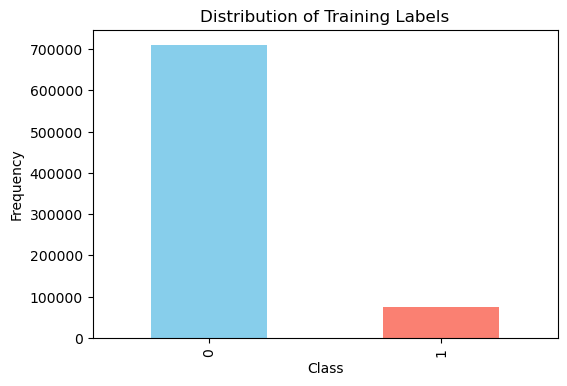

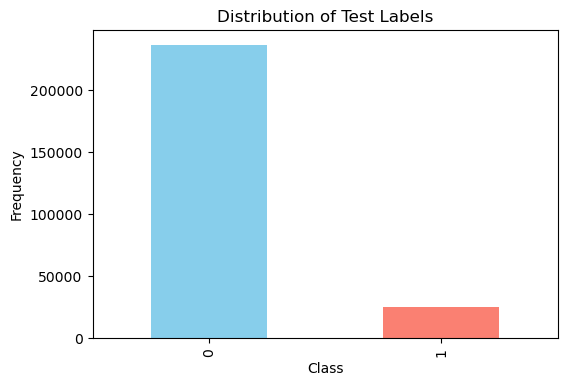

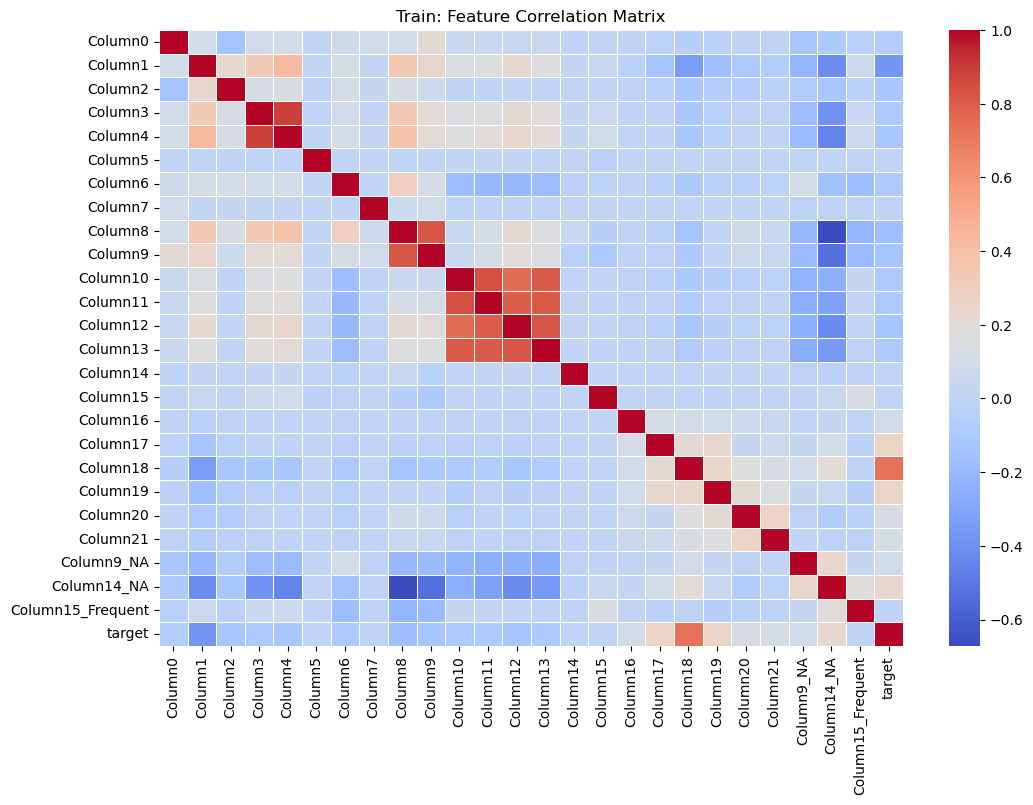

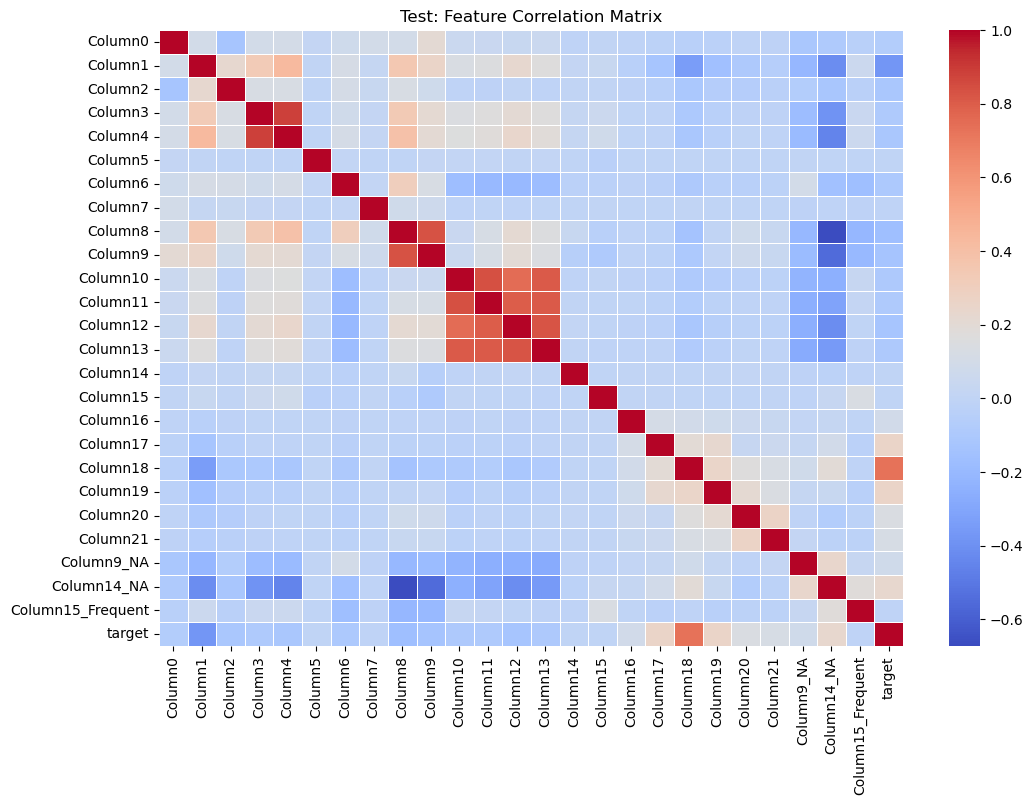

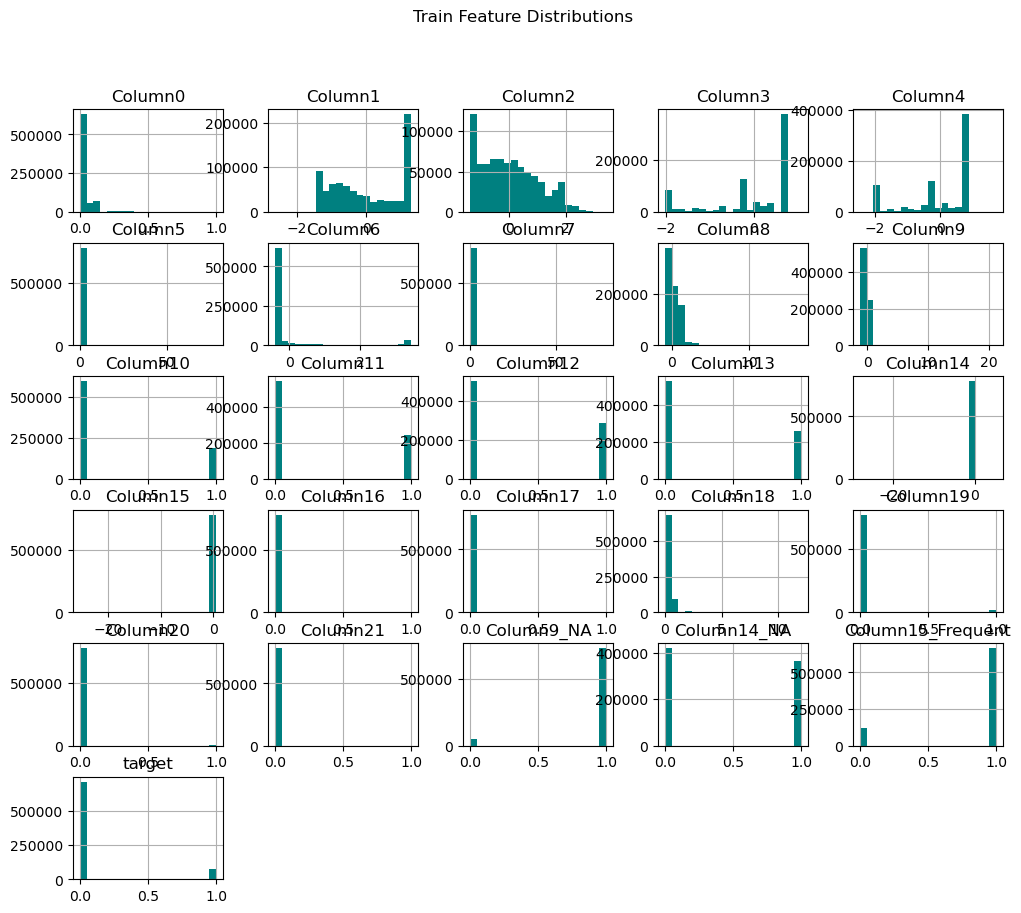

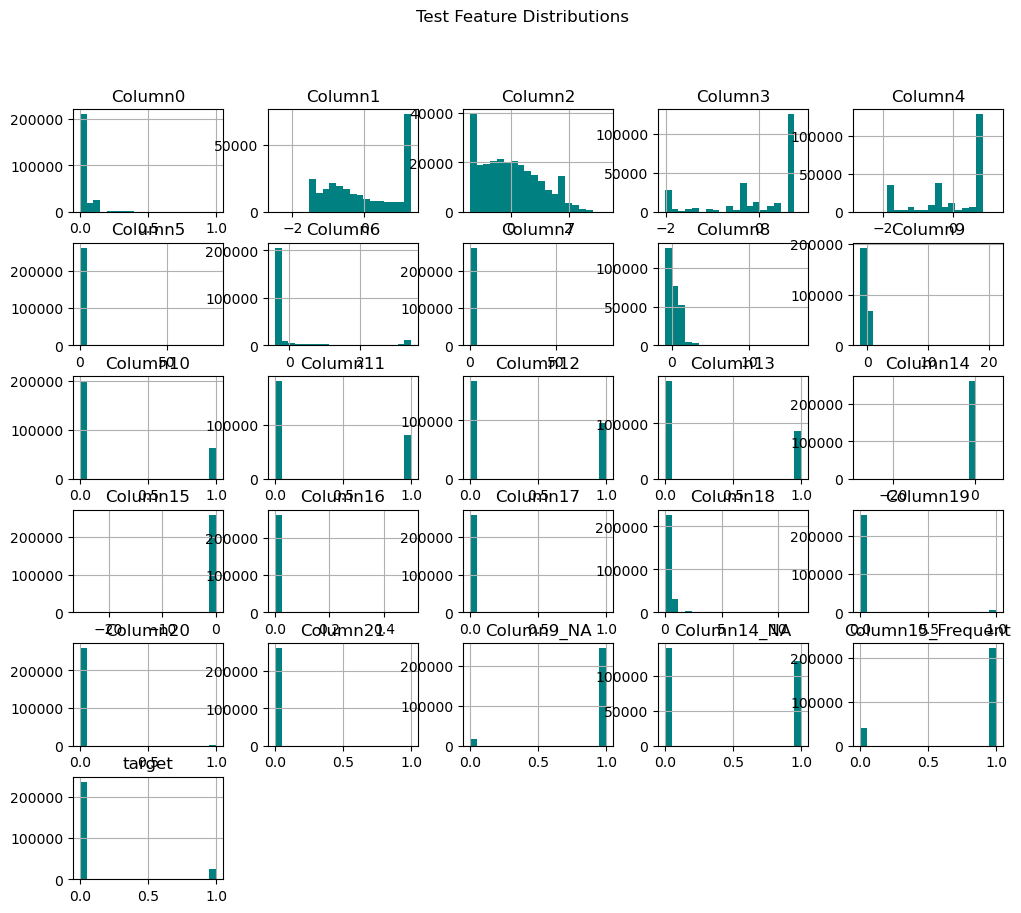

In [39]:
# Train: Visualize the distribution of the target labels in train dataset
plt.figure(figsize=(6,4))
combined_train['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Training Labels')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Test: Visualize the distribution of the target labels in test dataset
plt.figure(figsize=(6,4))
combined_test['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Test Labels')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Train: Visualizing the correlation matrix for numerical features (before handling missing values)
plt.figure(figsize=(12,8))
corr_matrix = combined_train.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Train: Feature Correlation Matrix")
plt.show()

# Test: Visualizing the correlation matrix for numerical features (before handling missing values)
plt.figure(figsize=(12,8))
corr_matrix = combined_test.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Test: Feature Correlation Matrix")
plt.show()


# Train: Visualize the distribution of each feature using histograms
combined_train.hist(figsize=(12,10), bins=20, color='teal')
plt.suptitle('Train Feature Distributions')
plt.show()

# Test: Visualize the distribution of each feature using histograms
combined_test.hist(figsize=(12,10), bins=20, color='teal')
plt.suptitle('Test Feature Distributions')
plt.show()

# Testing on Random Forest

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [27]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

C:\Users\siddh\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

Accuracy: 97.72%

Confusion Matrix:
[[232972   4062]
 [  1901  22777]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.92      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.95      0.94    261712
weighted avg       0.98      0.98      0.98    261712



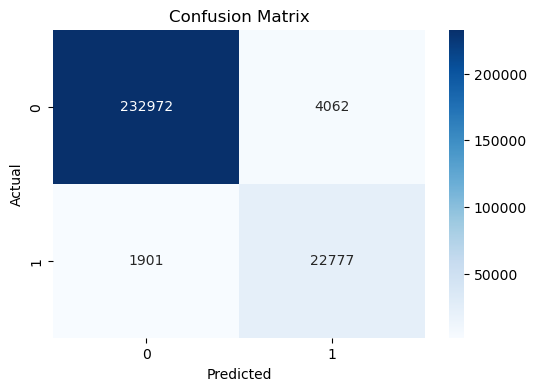

Precision: 0.85
Recall: 0.92
F1-Score: 0.88
ROC-AUC: 0.95


In [28]:
# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Visualizing the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")